In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

In [11]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

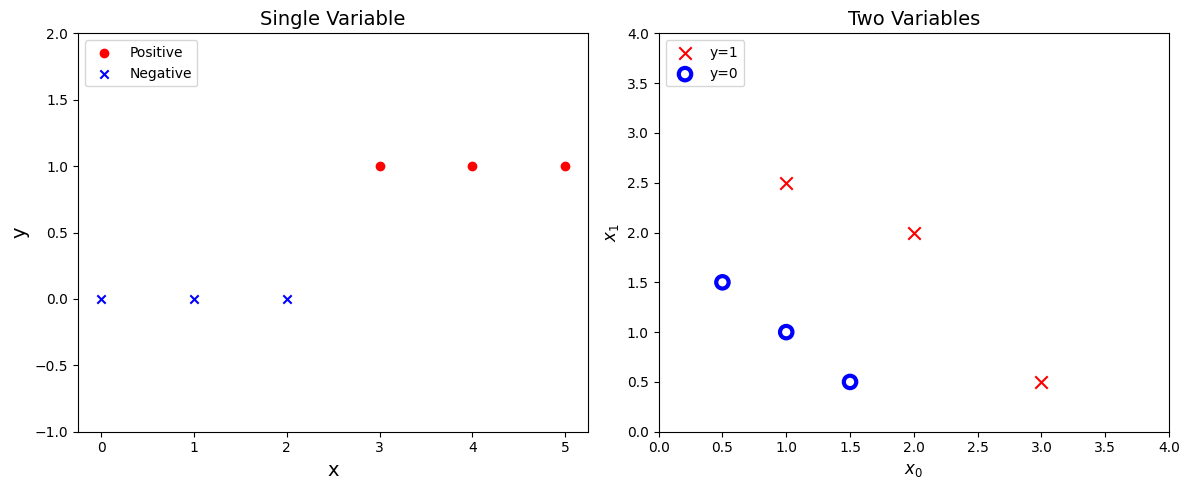

In [12]:
pos = (y_train == 1)
neg = (y_train == 0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# single variable
ax[0].scatter(x_train[pos], y_train[pos], color='red', marker='o', label='Positive')
ax[0].scatter(x_train[neg], y_train[neg], color='blue', marker='x', label='Negative')
ax[0].set_ylim(-1, 2)
ax[0].set_xlabel('x', fontsize=14)
ax[0].set_ylabel('y', fontsize=14)
ax[0].legend(loc='upper left')
ax[0].set_title('Single Variable', fontsize=14)

# two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_xlabel('$x_0$', fontsize = 12)
ax[1].set_ylabel('$x_1$', fontsize = 12)
ax[1].set_title('Two Variables', fontsize=14)
ax[1].legend(loc='upper left')
plt.tight_layout()
plt.show()



In [13]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [28]:
z_temp = np.linspace(-5, 5, 100)
y = sigmoid(z_temp)
print(y)


[0.00669285 0.00739896 0.00817894 0.00904041 0.00999169 0.01104196
 0.01220126 0.01348063 0.01489212 0.01644893 0.01816549 0.02005754
 0.0221422  0.02443814 0.02696557 0.02974643 0.03280439 0.036165
 0.0398557  0.04390588 0.04834692 0.05321217 0.0585369  0.06435824
 0.07071501 0.07764755 0.0851974  0.093407   0.1023192  0.11197671
 0.12242144 0.13369374 0.14583148 0.1588691  0.17283646 0.18775769
 0.20364993 0.22052213 0.23837374 0.25719365 0.2769591  0.29763488
 0.31917283 0.34151151 0.36457644 0.38828059 0.41252537 0.43720205
 0.46219351 0.48737642 0.51262358 0.53780649 0.56279795 0.58747463
 0.61171941 0.63542356 0.65848849 0.68082717 0.70236512 0.7230409
 0.74280635 0.76162626 0.77947787 0.79635007 0.81224231 0.82716354
 0.8411309  0.85416852 0.86630626 0.87757856 0.88802329 0.8976808
 0.906593   0.9148026  0.92235245 0.92928499 0.93564176 0.9414631
 0.94678783 0.95165308 0.95609412 0.9601443  0.963835   0.96719561
 0.97025357 0.97303443 0.97556186 0.9778578  0.97994246 0.98183451


Text(0.5, 0, 'z')

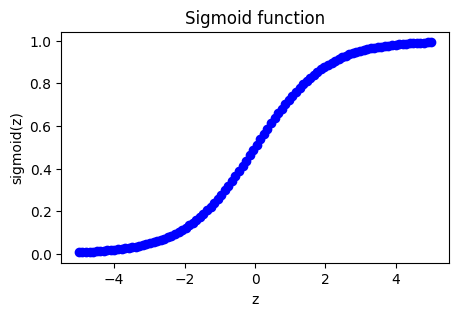

In [29]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.scatter(z_temp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

Logistic loss function

squared error cost function was convex function, but due to sigmoid function (non-linear) in logistic regression, the squared error cost function is no longer convex. so we need to use a different cost function.

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number.

> Definition Note:
Loss is a measure of the difference of a single example to its target value while the
Cost is a measure of the losses over the training set


This loss is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target.

In [34]:
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error

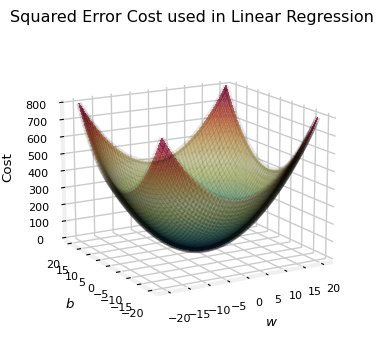

In [35]:
soup_bowl()

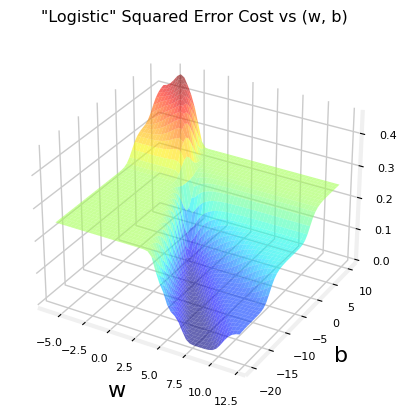

In [36]:
plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression!    

Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function.

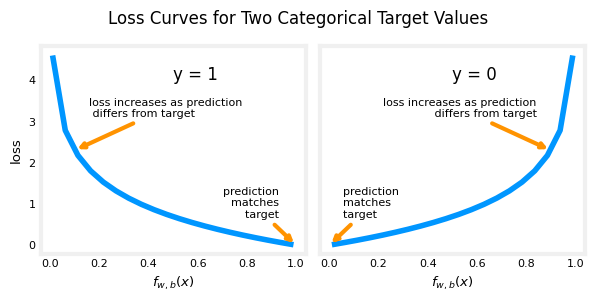

In [37]:
plt_two_logistic_loss_curves()

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

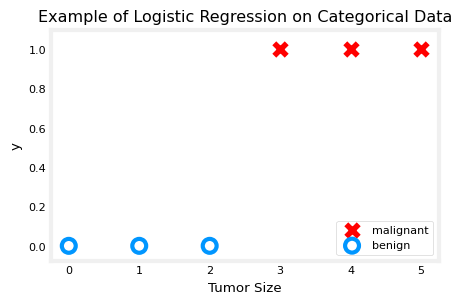

In [38]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

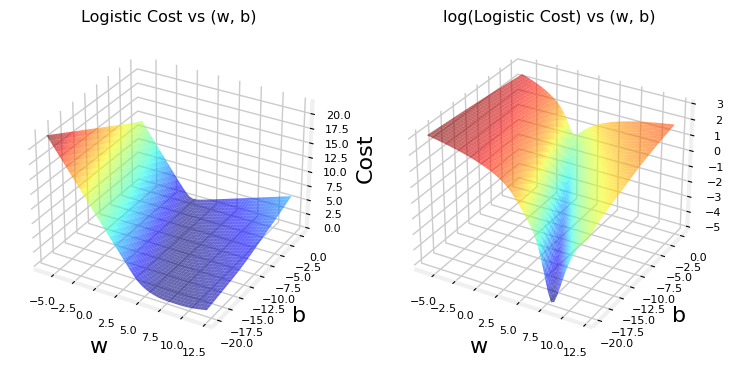

In [39]:
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline.